# Montar Google Drive

In [1]:
#Conectar com o Google Drive

from google.colab import drive
drive.mount('/content/drive')

#Conectando o ambiente ao Google Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Instalação
Para começar, vamos instalar as bibliotecas que serão usadas no projeto:

In [3]:
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install nltk
!pip install unidecode
import nltk
nltk.download('stopwords')
nltk.download('rslp')
nltk.download('punkt')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Importação de Bibliotecas

In [4]:
import pandas as pd
import string
import unicodedata
import string
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from nltk.stem.snowball import SnowballStemmer
from keras.preprocessing.text import Tokenizer
from collections import Counter

# Testes Isolados (experimentos)
Agora, vamos realizar alguns testes isolados para ver se tudo está funcionando corretamente. Primeiro, vamos importar a biblioteca pandas e ler um arquivo CSV com alguns dados:

In [5]:
data = pd.read_csv('/content/base2.csv')
data.head(10)

,id,"""dataPublicada""","""autor""","""texto""","""sentimento""","""tipoInteracao""","""anomalia""","""probabilidadeAnomalia""","""linkPost""","""processado""","""contemHyperlink"""
0,1,"""2022-03-04 09:38:00""",v8_capital,Confira os resultados dos nossos fundos no mês...,NEUTRAL,marcação,1,52,https://www.instagram.com/p/CarqO6drRux/,0,0
1,2,"""2022-03-04 09:29:00""",winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação,0,43,https://www.instagram.com/p/CarpQUluh7z/,0,0
2,3,"""2022-03-04 09:20:00""",marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação,0,45,https://www.instagram.com/p/CaroK9Nu8tC/,0,0
3,4,"""2022-03-04 08:36:00""",lmviapiana,Minuto touro de ouro,POSITIVE,comentário,0,38,https://www.instagram.com/p/CapXhB5Lvas/#17977...,0,0
4,5,"""2022-03-03 21:10:00""",vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta,0,17,https://www.instagram.com/p/CapXhB5Lvas/#17842...,0,0
5,6,"""2022-03-03 20:54:00""",ricktolledo,Queria saber se a Btg banking é a própria btg ...,POSITIVE,comentário,0,20,https://www.instagram.com/p/CapXhB5Lvas/#17935...,0,0
6,7,"""2022-03-03 20:21:00""",donadabolsaoficial,"Com o início da guerra entre Rússia e Ucrânia,...",NEGATIVE,marcação,0,46,https://www.instagram.com/p/CaqPAzlObCu/,0,0
7,8,"""2022-03-03 20:02:00""",clubefiinews,O Fundo Imobiliário Hospital Nossa Senhora de ...,NEGATIVE,marcação,0,39,https://www.instagram.com/p/CaqMkFfOgl9/,0,0
8,9,"""2022-03-03 19:25:00""",marciotome_,Sem alguns parceiros como a wiseaai e btgpactu...,NEUTRAL,marcação,0,31,https://www.instagram.com/p/CaqIqL4p8j1/,0,0
9,10,"""2022-03-03 19:07:00""",gustavonascimentoofc,Há 10 anos eu vivo 24 horas por dia o mercado ...,POSITIVE,marcação,0,33,https://www.instagram.com/p/CaqGlwHpz5i/,0,0


In [6]:
texto = data['"texto"']
print(texto)

0        Confira os resultados dos nossos fundos no mês...
1        A Alvarez & Marsal estará conosco no Sportainm...
2        #Repost btgpactual with make_repost ・・・ Entend...
3                                     Minuto touro de ouro
4                                         @ricktolledo Sim
                               ...                        
12350    Uma noite de encontros e muito conhecimento on...
12351    Erros financeiros para eliminar antes dos 30 a...
12352    Estou muito grato por todo o esforço que você ...
12353    "👉GUADAKAN está chegando!!!!  A aula pública e...
12354    @btgpactual pq o morning call não está mais ap...
Name: "texto", Length: 12355, dtype: object


In [7]:
autor = data['"autor"'].count()
autor

12355

In [8]:
df_filtered = data.loc[data['"autor"'] != 'btgpactual']
df_filtered

,id,"""dataPublicada""","""autor""","""texto""","""sentimento""","""tipoInteracao""","""anomalia""","""probabilidadeAnomalia""","""linkPost""","""processado""","""contemHyperlink"""
0,1,"""2022-03-04 09:38:00""",v8_capital,Confira os resultados dos nossos fundos no mês...,NEUTRAL,marcação,1,52,https://www.instagram.com/p/CarqO6drRux/,0,0
1,2,"""2022-03-04 09:29:00""",winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação,0,43,https://www.instagram.com/p/CarpQUluh7z/,0,0
2,3,"""2022-03-04 09:20:00""",marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação,0,45,https://www.instagram.com/p/CaroK9Nu8tC/,0,0
3,4,"""2022-03-04 08:36:00""",lmviapiana,Minuto touro de ouro,POSITIVE,comentário,0,38,https://www.instagram.com/p/CapXhB5Lvas/#17977...,0,0
4,5,"""2022-03-03 21:10:00""",vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta,0,17,https://www.instagram.com/p/CapXhB5Lvas/#17842...,0,0
...,...,...,...,...,...,...,...,...,...,...,...
12350,3044013,"""2022-11-30 11:51:00""",onixcapital,Uma noite de encontros e muito conhecimento on...,NEUTRAL,marcação,1,54,https://www.instagram.com/reel/CllsqI7goSC/,0,0
12351,3044212,"""2022-11-30 12:25:00""",amgcapitalinvest,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,marcação,0,39,https://www.instagram.com/p/Cllw0CmNGkX/,0,0
12352,3044213,"""2022-11-30 12:18:00""",jayipacderota,Estou muito grato por todo o esforço que você ...,POSITIVE,comentário,1,52,https://www.instagram.com/p/CllkSBOuKlJ/#17960...,0,0
12353,3044412,"""2022-11-30 12:50:00""",moinho_cultural,"""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL,marcação,0,43,https://www.instagram.com/reel/ClluX-cAoaf/,0,0


In [9]:
data.head(3)

,id,"""dataPublicada""","""autor""","""texto""","""sentimento""","""tipoInteracao""","""anomalia""","""probabilidadeAnomalia""","""linkPost""","""processado""","""contemHyperlink"""
0,1,"""2022-03-04 09:38:00""",v8_capital,Confira os resultados dos nossos fundos no mês...,NEUTRAL,marcação,1,52,https://www.instagram.com/p/CarqO6drRux/,0,0
1,2,"""2022-03-04 09:29:00""",winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação,0,43,https://www.instagram.com/p/CarpQUluh7z/,0,0
2,3,"""2022-03-04 09:20:00""",marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação,0,45,https://www.instagram.com/p/CaroK9Nu8tC/,0,0


In [10]:
data['"anomalia"'].value_counts()

0    9608
1    2747
Name: "anomalia", dtype: int64

In [11]:
data['"tipoInteracao"'].value_counts()

marcação      5999
comentário    5389
resposta       967
Name: "tipoInteracao", dtype: int64

- Feed: 
  - Image no feed (215)
  - Video no feed (201)
  - Reels no feed (1177)
  - Carousel album no feed = fotos com mais de 1 (184)

- Reels (839): fora do feed



In [12]:
# Não tem mais o tipo de mídia...
# data['"tipoMidia"'].value_counts()

# Definição de Funções e Testes
Agora, vamos definir algumas funções que serão utilizadas no nosso projeto.

### 1. Stopwords, Tokenização e Pontuação

In [13]:
# define a tokenizer function using nltk's word_tokenize and stopwords
stop_words = set(stopwords.words('portuguese'))

def tokenize_text(text):
    if isinstance(text, str):
        tokens = word_tokenize(text.lower())
        tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    else:
        tokens = []
    return tokens

# apply the tokenizer function to the 'texto' column of the DataFrame
data['tokenized_text'] = data['"texto"'].apply(tokenize_text)
print(data['tokenized_text'][0])

['confira', 'resultados', 'fundos', 'mês', 'todas', 'informações', 'documentações', 'materiais', 'técnicos', 'fundos', 'podem', 'acessados', 'links', 'abaixo', 'cash', 'fi', 'renda', 'fixa', 'cp', 'https', 'vanquish', 'termo', 'fi', 'renda', 'fixa', 'https', 'veyron', 'smart', 'beta', 'fi', 'ações', 'https', 'elva', 'deb', 'incentivadas', 'fic', 'fim', 'cp', 'https', 'challenger', 'fim', 'cp', 'https', 'anf', 'luxbridge', 'global', 'real', 'estate', 'fim', 'ie', 'https', 'onde', 'encontra', 'fundos', 'modalmais', 'oramainvestimentos', 'warrenbrasil', 'terrainvestimentosoficial', 'ativainvestimentos', 'novafuturainvestimentos', 'nubank', 'nectoninvestimentos', 'miraeassetcorretora', 'toroinvestimentos', 'rbinvestimentos', 'guideinvestimentos', 'btgpactual', 'xpinvestimentos', 'simpaulinvestimentos', 'investir', 'investimentos', 'mercadofinanceiro', 'ibovespa', 'cdi', 'rendafixa', 'multimercado', 'ações']


### 2. Tokenização

In [14]:
# define a tokenizer function using nltk's word_tokenize
def tokenize_text(text):
    if isinstance(text, str):
        tokens = word_tokenize(text)
    else:
        tokens = []
    return tokens

# apply the tokenizer function to the 'texto' column of the DataFrame
data['tokenized_text'] = data['"texto"'].apply(tokenize_text)
print(data['tokenized_text'][0])

['Confira', 'os', 'resultados', 'dos', 'nossos', 'fundos', 'no', 'mês', 'de', 'fevereiro/22', '.', 'Todas', 'as', 'informações', ',', 'documentações', 'e', 'materiais', 'técnicos', 'dos', 'fundos', 'podem', 'ser', 'acessados', 'pelos', 'links', 'abaixo', ':', '>', 'V8', 'Cash', 'FI', 'Renda', 'Fixa', 'CP', ':', 'https', ':', '//lnkd.in/dusC2Jmn', '>', 'V8', 'Vanquish', 'Termo', 'FI', 'Renda', 'Fixa', ':', 'https', ':', '//lnkd.in/d3PnGJUu', '>', 'V8', 'Veyron', 'Smart', 'Beta', 'FI', 'Ações', ':', 'https', ':', '//lnkd.in/dJnJW4PP', '>', 'V8', 'Elva', 'Deb', '.', 'Incentivadas', 'FIC', 'FIM', 'CP', ':', 'https', ':', '//lnkd.in/dap-37vV', '>', 'V8', 'Challenger', 'FIM', 'CP', ':', 'https', ':', '//lnkd.in/d5bNHZQJ', '>', 'V8', 'ANF', 'Luxbridge', 'Global', 'Real', 'Estate', 'FIM', 'IE', ':', 'https', ':', '//lnkd.in/dXZcaTpp', 'Onde', 'você', 'encontra', 'nossos', 'fundos', ':', 'modalmais', 'oramainvestimentos', 'warrenbrasil', 'terrainvestimentosoficial', 'ativainvestimentos', 'novaf

### 3. Stemming

In [15]:
# define a function to remove accents, lowercase, and stem the text
def preprocess_text(text):
    if isinstance(text, str):
        # remove accents and lowercase the text
        text = ''.join(c for c in unicodedata.normalize('NFKD', text) if unicodedata.category(c) != 'Mn')
        text = text.lower()

        # stem the text using SnowballStemmer for Portuguese
        stemmer = SnowballStemmer('portuguese')
        words = text.split()
        words = [stemmer.stem(word) for word in words]
        text = ' '.join(words)
        return text
    else:
        return text

# apply the function to the 'texto' column of the DataFrame
data['processed_text'] = data['"texto"'].apply(preprocess_text)
print(data['processed_text'][0])

# MOSTRAR AMANHÃ

# define a tokenizer function using nltk's word_tokenize
def tokenize_text(text):
    if isinstance(text, str):
        tokens = word_tokenize(text)
    else:
        tokens = []
    return tokens

# apply the tokenizer function to the 'texto' column of the DataFrame
data['tokenized_text'] = data['processed_text'].apply(tokenize_text)
print(data['tokenized_text'][0])

conf os result dos noss fund no mes de fevereiro/22. tod as informacoes, documentaco e materi tecnic dos fund pod ser acess pel links abaixo: > v8 cash fi rend fix cp: https://lnkd.in/dusc2jmn > v8 vanquish term fi rend fixa: https://lnkd.in/d3pngjuu > v8 veyron smart bet fi acoes: https://lnkd.in/djnjw4pp > v8 elva deb. incentiv fic fim cp: https://lnkd.in/dap-37vv > v8 challeng fim cp: https://lnkd.in/d5bnhzqj > v8 anf luxbridg global real estat fim ie: https://lnkd.in/dxzcatpp onde voc encontr noss fundos: modalm oramainvest warrenbrasil terrainvestimentosoficial ativainvest novafuturainvest nubank nectoninvest miraeassetcorretor toroinvest rbinvest guideinvest btgpactual xpinvest simpaulinvest #v8capital #invest #invest #mercadofinanceir #ibovesp #cdi #rendafix #multimerc #aco
['conf', 'os', 'result', 'dos', 'noss', 'fund', 'no', 'mes', 'de', 'fevereiro/22', '.', 'tod', 'as', 'informacoes', ',', 'documentaco', 'e', 'materi', 'tecnic', 'dos', 'fund', 'pod', 'ser', 'acess', 'pel', 'l

In [16]:
# define a lista de stopwords
stopwords_list = stopwords.words('portuguese')

# define a função
def stemming_text(text):
    if isinstance(text, str):
        # remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))

        # remove accents and lowercase the text
        text = ''.join(c for c in unicodedata.normalize('NFKD', text) if unicodedata.category(c) != 'Mn')
        text = text.lower()

        # tokenize the text
        tokens = word_tokenize(text)

        # remove stopwords
        tokens = [token for token in tokens if token not in stopwords_list]

        # stem the text using SnowballStemmer for Portuguese
        stemmer = SnowballStemmer('portuguese')
        tokens = [stemmer.stem(token) for token in tokens]

        # join the tokens back into a string
        text = ' '.join(tokens)
        return text
    else:
        return text

# apply the function to the 'texto' column of the DataFrame
data['processed_text'] = data['"texto"'].apply(stemming_text)
print(data['processed_text'][0])

conf result fund mes fevereiro22 tod informaco documentaco materi tecnic fund pod acess links abaix v8 cash fi rend fix cp httpslnkdindusc2jmn v8 vanquish term fi rend fix httpslnkdind3pngjuu v8 veyron smart bet fi aco httpslnkdindjnjw4pp v8 elva deb incentiv fic fim cp httpslnkdindap37vv v8 challeng fim cp httpslnkdind5bnhzqj v8 anf luxbridg global real estat fim ie httpslnkdindxzcatpp onde voc encontr fund modalm oramainvest warrenbrasil terrainvestimentosoficial ativainvest novafuturainvest nubank nectoninvest miraeassetcorretor toroinvest rbinvest guideinvest btgpactual xpinvest simpaulinvest v8capital invest invest mercadofinanceir ibovesp cdi rendafix multimerc aco


###4. Remoção de acentos

In [17]:
# define a function to remove accents and lowercase the text
def remove_accents_and_lowercase(text):
    if isinstance(text, str):
        text = ''.join(c for c in unicodedata.normalize('NFKD', text) if unicodedata.category(c) != 'Mn')
        return text.lower()
    else:
        return text

# apply the function to the 'texto' column of the DataFrame
data['texto_processed'] = data['"texto"'].apply(remove_accents_and_lowercase)
print(data['texto_processed'][0:5])

0    confira os resultados dos nossos fundos no mes...
1    a alvarez & marsal estara conosco no sportainm...
2    #repost btgpactual with make_repost ・・・ entend...
3                                 minuto touro de ouro
4                                     @ricktolledo sim
Name: texto_processed, dtype: object


# Processamentos/Demonstrações

In [18]:
# carrega o arquivo CSV como um DataFrame
data = pd.read_csv('/content/base2.csv')

# remove os valores nulos do DataFrame
data = data.dropna()

# define uma lista de stopwords
stopwords_list = stopwords.words('portuguese')

# define uma função para pré-processar o texto
def preprocess_text(text):
    if isinstance(text, str):
        # remove a pontuação
        text = text.translate(str.maketrans('', '', string.punctuation))

        # remove acentos e coloca todo o texto em minúsculas
        text = ''.join(c for c in unicodedata.normalize('NFKD', text) if unicodedata.category(c) != 'Mn')
        text = text.lower()

        # tokeniza o texto
        tokens = word_tokenize(text)

        # remove as stopwords
        tokens = [token for token in tokens if token not in stopwords_list]

        # aplica o processo de stemming usando SnowballStemmer para Português
        stemmer = SnowballStemmer('portuguese')
        tokens = [stemmer.stem(token) for token in tokens]

        # junta os tokens em uma única string de texto
        text = ' '.join(tokens)
        return text
    else:
        return text

# aplica a função de pré-processamento à coluna 'texto' do DataFrame
data['texto_processado'] = data['"texto"'].apply(preprocess_text)

# exibe os dados pré-processados
print(data['texto_processado'])

0        conf result fund mes fevereiro22 tod informaco...
1        alvarez marsal estar conosc sportainmet® labs ...
2        repost btgpactual with makerepost ・・・ entend i...
3                                           minut tour our
4                                           ricktolled sim
                               ...                        
12350    noit encontr conhec onde client barreirasb pud...
12351    erros financeir elimin antes 30 anos 1 par ost...
12352    grat tod esforc voc rend invest r 17000 alegr ...
12353    👉guadakan cheg aul public format espetacul moi...
12354    btgpactual pq morning call nao aparec spotify ...
Name: texto_processado, Length: 12355, dtype: object


In [19]:
#data['texto'].tolist()

In [20]:
docs = data['texto_processado']

# Determinar o vocabulário
tokenizer = Tokenizer()
tokenizer.fit_on_texts(docs)
print(f'Vocabulário: {list(tokenizer.word_index.keys())}')

# Contagem
vectors = tokenizer.texts_to_matrix(docs, mode='count')
print(vectors)

Vocabulário: ['btgpactual', 'invest', 'nao', 'voc', 'btg', 'tod', 'banc', 'cont', 'sobr', 'melhor', 'merc', 'financeir', 'dia', 'event', 'faz', 'pod', 'pactual', 'ja', 'fund', 'sao', 'link', 'client', 'maior', 'so', 'hoj', 'brasil', 'nov', 'obrig', 'econom', 'ter', '“', 'pra', 'quer', '”', 'vid', 'tamb', 'part', 'empres', 'r', 'trabalh', 'valor', 'tud', 'mes', '2022', 'aind', 'dinheir', 'aco', 'acess', 'tim', 'pass', 'ativ', 'grand', 'bio', 'outr', 'aqu', 'sab', 'fic', 'ano', 'seman', 'sempr', 'conhec', 'pesso', 'assessor', 'compr', 'primeir', 'receb', 'cad', 'ajud', 'fal', 'dess', 'agor', 'ate', 'carta', 'tax', 'comec', 'dias', 'paul', 'limit', 'especial', 'mercadofinanceir', 'investidor', 'oportun', 'particip', 'anos', 'bem', 'vai', 'precis', 'vez', 'muit', 'agradec', 'vend', 'rend', 'trad', 'credit', 'ser', 'experienc', 'alem', 'negoci', 'marc', 'inform', 'nest', 'ultim', 'histor', 'futur', 'carteir', 'polit', 'selic', 'esta', 'cas', 'junt', 'financ', 'complet', 'acontec', 'encontr'

In [21]:
tokenizer.word_counts, tokenizer.document_count, tokenizer.word_index, tokenizer.word_docs

(OrderedDict([('conf', 399),
              ('result', 367),
              ('fund', 1086),
              ('mes', 687),
              ('fevereiro22', 1),
              ('tod', 1820),
              ('informaco', 253),
              ('documentaco', 10),
              ('materi', 18),
              ('tecnic', 146),
              ('pod', 1239),
              ('acess', 663),
              ('links', 16),
              ('abaix', 169),
              ('v8', 80),
              ('cash', 23),
              ('fi', 67),
              ('rend', 463),
              ('fix', 207),
              ('cp', 34),
              ('httpslnkdindusc2jmn', 2),
              ('vanquish', 16),
              ('term', 55),
              ('httpslnkdind3pngjuu', 2),
              ('veyron', 15),
              ('smart', 19),
              ('bet', 24),
              ('aco', 665),
              ('httpslnkdindjnjw4pp', 2),
              ('elva', 15),
              ('deb', 13),
              ('incentiv', 52),
              ('fic',

In [22]:
def process_text_data(data, texto):
    # Extrair a coluna "texto" como uma lista de strings
    docs = data['"texto"'].tolist()

    ## Passo 1: Determinar o vocabulário
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(docs)
    print(f'Vocabulário: {list(tokenizer.word_index.keys())}')

    ## Passo 2: Contagem
    vectors = tokenizer.texts_to_matrix(docs, mode='count')
    return vectors

In [23]:
print(vectors)

[[0. 1. 2. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 1. 1. 1.]
 [0. 1. 0. ... 0. 0. 0.]]


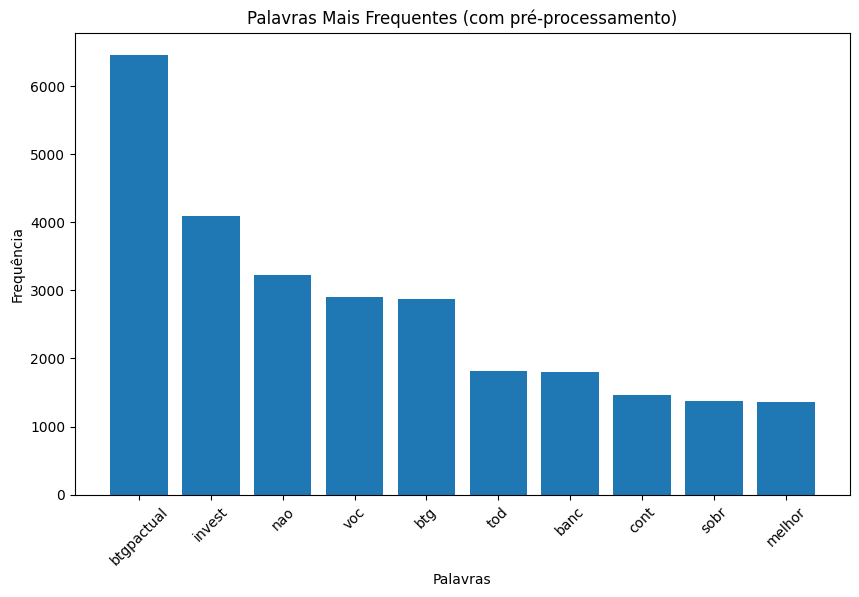

In [24]:
# Definir stopwords em português
stopwords_pt = set(stopwords.words('portuguese'))

# Tokenizar o texto, remover stopwords e aplicar pré-processamento
tokenized_text = []
for text in data['texto_processado']:
    if isinstance(text, str):
        tokens = word_tokenize(text.lower())
        tokens = [token for token in tokens if token.isalpha() and token not in stopwords_pt]
        tokenized_text.extend(tokens)

# Contar frequência das palavras
word_freq = Counter(tokenized_text)

# Selecionar as palavras mais frequentes
top_words = word_freq.most_common(10)  # Altere o número 10 para a quantidade desejada

# Extrair palavras e frequências
words = [word for word, freq in top_words]
freqs = [freq for word, freq in top_words]

# Criar gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(words, freqs)
plt.xlabel('Palavras')
plt.ylabel('Frequência')
plt.title('Palavras Mais Frequentes (com pré-processamento)')
plt.xticks(rotation=45)
plt.show()

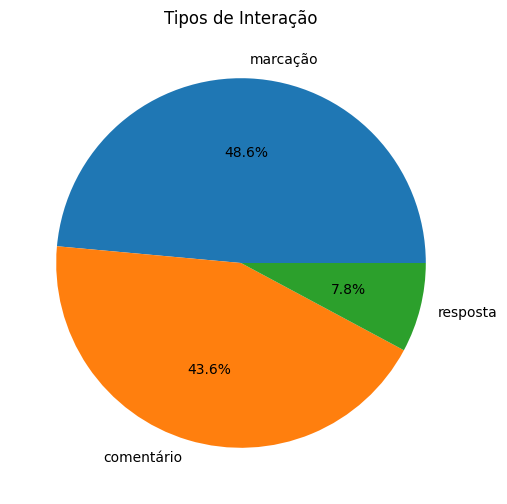

In [25]:
# Carregar o arquivo CSV
data = pd.read_csv('/content/base2.csv')

# Contar os tipos de interação
count_interactions = data['"tipoInteracao"'].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(8, 6))
count_interactions.plot(kind='pie', autopct='%1.1f%%')
plt.title('Tipos de Interação')
plt.ylabel('')
plt.show()

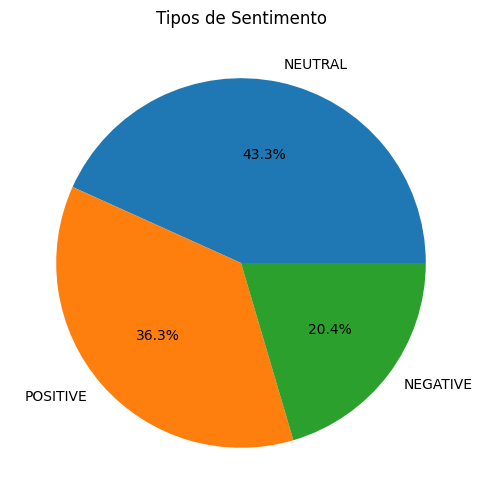

In [26]:
# Gráfico tipos de sentimentos
# Contar os tipos de sentimentos
count_sentimentos = data['"sentimento"'].value_counts()
# Criar o gráfico de pizza
plt.figure(figsize=(8, 6))
count_sentimentos.plot(kind='pie', autopct='%1.1f%%')
plt.title('Tipos de Sentimento')
plt.ylabel('')
plt.show()

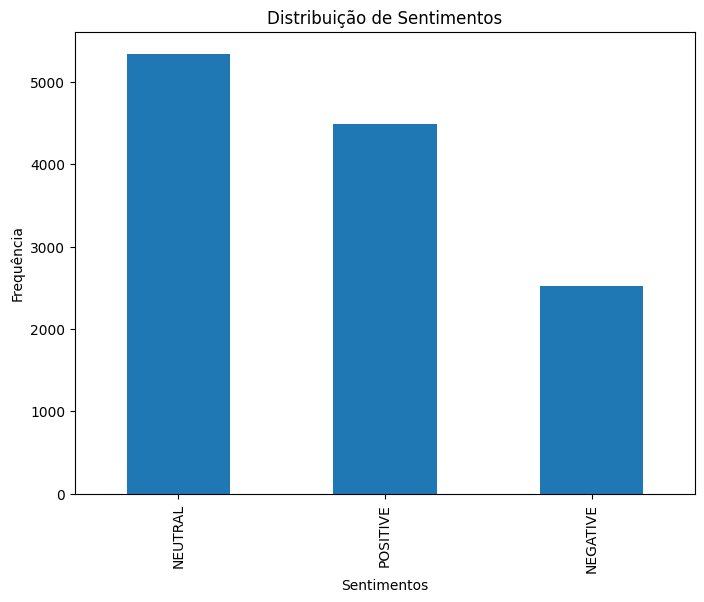

In [27]:
# Contar a frequência dos sentimentos
sentiment_counts = data['"sentimento"'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar')
plt.title('Distribuição de Sentimentos')
plt.xlabel('Sentimentos')
plt.ylabel('Frequência')
plt.show()

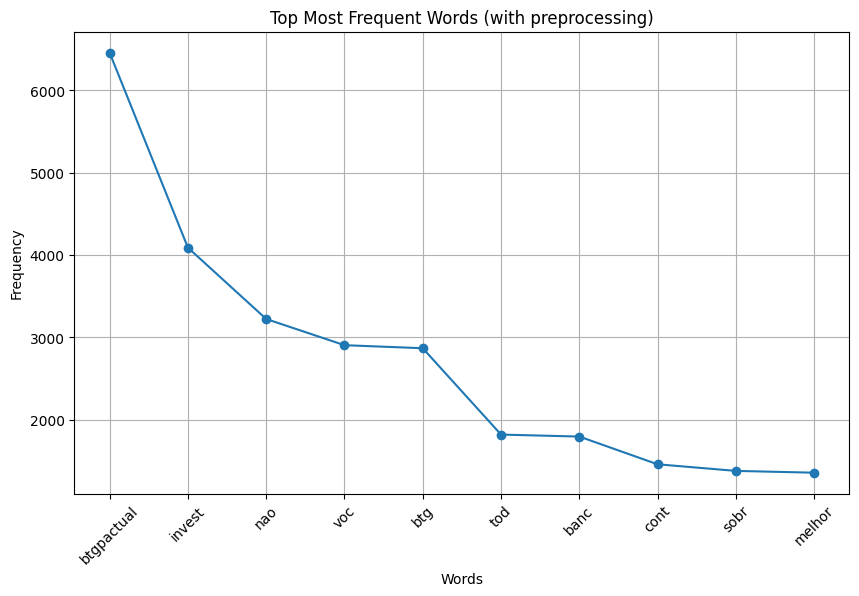

In [28]:
# Count word frequencies
word_freq = Counter(tokenized_text)

# Select the most frequent words
top_words = word_freq.most_common(10)  # Change the number 10 to the desired quantity

# Extract words and frequencies
words = [word for word, freq in top_words]
freqs = [freq for word, freq in top_words]

# Create line chart
plt.figure(figsize=(10, 6))
plt.plot(words, freqs, marker='o', linestyle='-')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top Most Frequent Words (with preprocessing)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()